# 06-1 객체지향 API로 그래프 꾸미기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/06-1.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-da/blob/main/06-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## pyplot 방식과 객체지향 API 방식

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

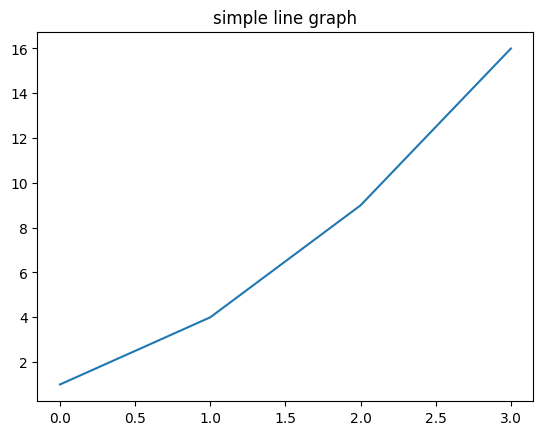

In [2]:
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

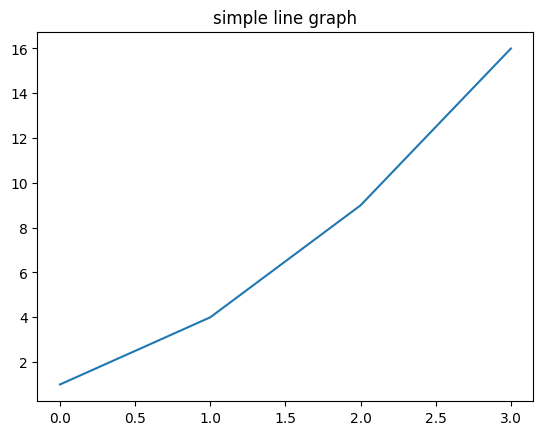

In [3]:
fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 그래프에 한글 출력하기

이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 코랩의 경우 다음 셀에서 나눔 폰트를 직접 설치합니다.

In [4]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
plt.rcParams['figure.dpi'] = 100

In [6]:
plt.rcParams['font.family']

['sans-serif']

In [7]:
# 나눔고딕 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'

In [8]:
# 위와 동일하지만 이번에는 나눔바른고딕 폰트로 설정합니다.
plt.rc('font', family='NanumBarunGothic')

In [9]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [10]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


In [11]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fo

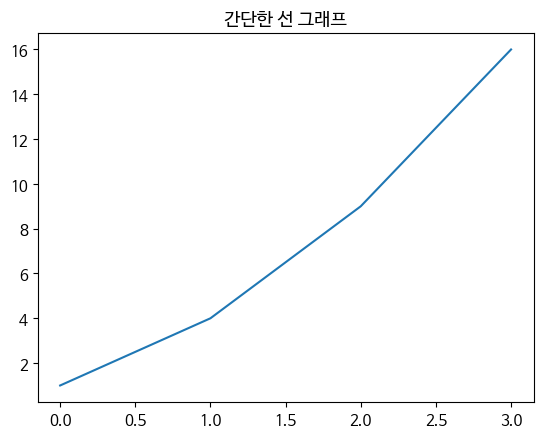

In [12]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [13]:
plt.rc('font', size=10)

## 출판사별 발행 도서 개수 산점도 그리기

In [14]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:02<00:00, 26.2MB/s]


'ns_book7.csv'

In [15]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [16]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

,count
출판사,
문학동네,4410
민음사,3349
김영사,3246
웅진씽크빅,3227
시공사,2685
창비,2469
문학과지성사,2064
위즈덤하우스,1981
학지사,1877


In [17]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

,출판사
0,True
1,False
2,False
3,False
4,True
...,...
376765,False
376766,False
376767,True
376768,False


In [18]:
top30_pubs_idx.sum()

np.int64(51886)

In [19]:
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


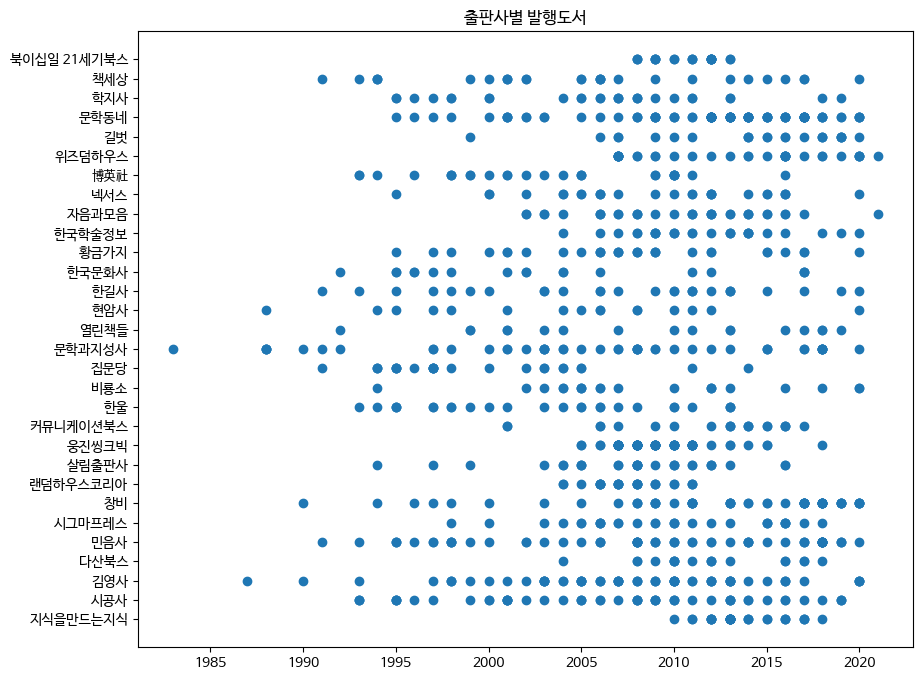

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행도서')
fig.show()

In [21]:
plt.rcParams['lines.markersize']

6.0

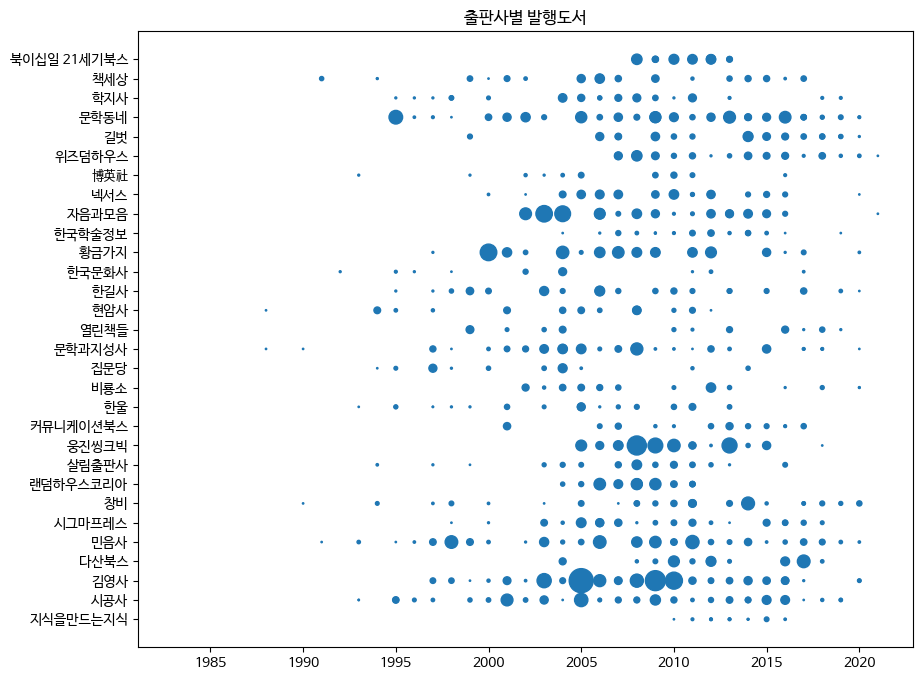

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

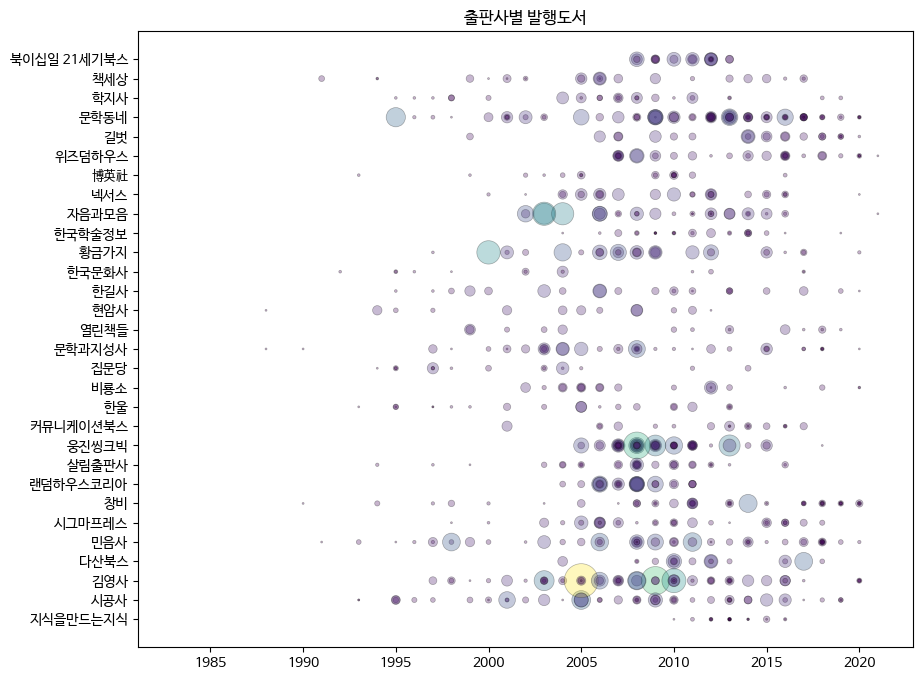

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],
           linewidths=0.5, edgecolors='k', alpha=0.3,
           s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

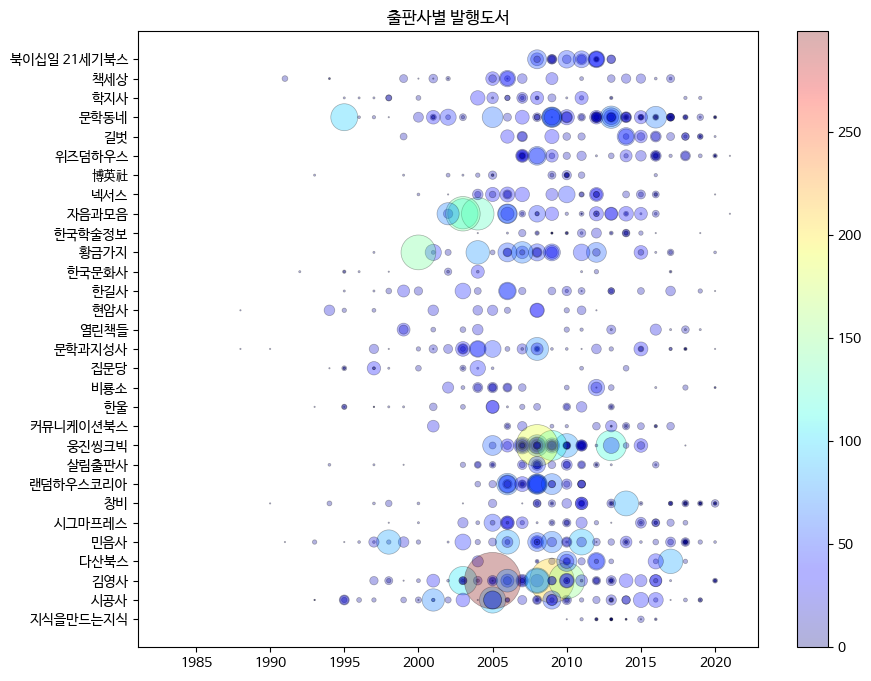

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet')
ax.set_title('출판사별 발행도서')
fig.colorbar(sc)
fig.show()